# Brain Tumor Classification Pipeline

## Imports

In [17]:
# system modules
import os
import itertools
from PIL import Image

# preprocessing modules
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

import cv2

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# deep learning modules
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation
from tensorflow.keras.optimizers import Adam, Adamax

#import warnings
#warnings.filterwarnings('ignore')

## Preprocessing

### Training Data

In [18]:
# path to training data directory
training_data_path = os.path.normpath("C:\\Users\\Ajinkya Pawar\\OneDrive\\Documents\\tum\\MRI-Brain-Tumor-Detection-main\\mri-images")

# initialize lists to store paths of images and their labels
img_paths = []
labels = []

# directories -> lists
training_dir = os.listdir(training_data_path)

In [19]:
# get paths and labels of classes and images in training directory
for i in training_dir:
    class_path = os.path.join(training_data_path, i)
    img_list = os.listdir(class_path)

    for img in img_list:
        img_path = os.path.join(class_path, img)
        img_paths.append(img_path)
        labels.append(i)

In [20]:
# convert lists of img_Paths and their labels into Pandas Series
paths = pd.Series(img_paths, name="path")
labels = pd.Series(labels, name="label")

# concatenate into one Pandas Dataframe
train_data = pd.concat([paths, labels], axis=1)

In [21]:
train_data.shape

(100, 2)

In [22]:
train_data.head()

path   label
0  C:\Users\Ajinkya Pawar\OneDrive\Documents\tum\...  glioma
1  C:\Users\Ajinkya Pawar\OneDrive\Documents\tum\...  glioma
2  C:\Users\Ajinkya Pawar\OneDrive\Documents\tum\...  glioma
3  C:\Users\Ajinkya Pawar\OneDrive\Documents\tum\...  glioma
4  C:\Users\Ajinkya Pawar\OneDrive\Documents\tum\...  glioma

### Test Data

In [23]:
# path to test data directory
testing_data_path = os.path.normpath("C:\\Users\\Ajinkya Pawar\\OneDrive\\Documents\\tum\\MRI-Brain-Tumor-Detection-main\\mri-images")

# initialize lists to store paths of images and their labels
img_paths = []
labels = []

# directories -> lists
testing_dir = os.listdir(testing_data_path)

In [24]:
# get paths and labels of classes and images in testing directory
for i in testing_dir:
    class_path = os.path.join(testing_data_path, i)
    img_list = os.listdir(class_path)

    for img in img_list:
        img_path = os.path.join(class_path, img)
        img_paths.append(img_path)
        labels.append(i)

In [25]:
# convert lists of img_Paths and their labels into Pandas Series
paths = pd.Series(img_paths, name="path")
labels = pd.Series(labels, name="label")

# concatenate into one Pandas Dataframe
test_data = pd.concat([paths, labels], axis=1)

In [26]:
test_data.shape

(100, 2)

In [27]:
test_data.head()

path   label
0  C:\Users\Ajinkya Pawar\OneDrive\Documents\tum\...  glioma
1  C:\Users\Ajinkya Pawar\OneDrive\Documents\tum\...  glioma
2  C:\Users\Ajinkya Pawar\OneDrive\Documents\tum\...  glioma
3  C:\Users\Ajinkya Pawar\OneDrive\Documents\tum\...  glioma
4  C:\Users\Ajinkya Pawar\OneDrive\Documents\tum\...  glioma

### Split Test Data into Validation and Test Set

In [28]:
# split test data in half to a validation and test set
# shuffled since originally ordered by tumor classification
valid_df, test_df = train_test_split(test_data, train_size = 0.5, shuffle = True, random_state = 123)
print("Test Set shape:", test_df.shape)
print("Validation Set shape:", valid_df.shape)### Split Test Data into Validation and Test Set

Test Set shape: (50, 2)
Validation Set shape: (50, 2)


### Create Image Generators

In [29]:
# hyperparameters
batch_size = 20
img_size = (224,224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

# initialize generators
training_generator = ImageDataGenerator(fill_mode='nearest')
validation_generator = ImageDataGenerator()
testing_generator = ImageDataGenerator()

### Generate New Data for Fitting into Model

In [30]:
train = training_generator.flow_from_dataframe(train_data, x_col = 'path', y_col = 'label', target_size = img_size, class_mode = 'categorical', color_mode = 'rgb', shuffle = True, batch_size = batch_size)

Found 100 validated image filenames belonging to 4 classes.


In [31]:
valid = validation_generator.flow_from_dataframe(valid_df, x_col = 'path', y_col = 'label', target_size = img_size, class_mode = 'categorical', color_mode = 'rgb', shuffle = True, batch_size = batch_size)

Found 50 validated image filenames belonging to 4 classes.


In [32]:
test = testing_generator.flow_from_dataframe(test_df, x_col = 'path', y_col = 'label', target_size = img_size, class_mode = 'categorical', color_mode = 'rgb', shuffle = False, batch_size = batch_size)

Found 50 validated image filenames belonging to 4 classes.


### Sample Batch from Training Data

In [33]:
# define labels and their indices in a dictionary
label_index = train.class_indices
label_index

{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}

In [34]:
# label list
keys = list(label_index.keys())
keys

['glioma', 'meningioma', 'notumor', 'pituitary']

In [35]:
# get a sample batch
imgs, labels = next(train)

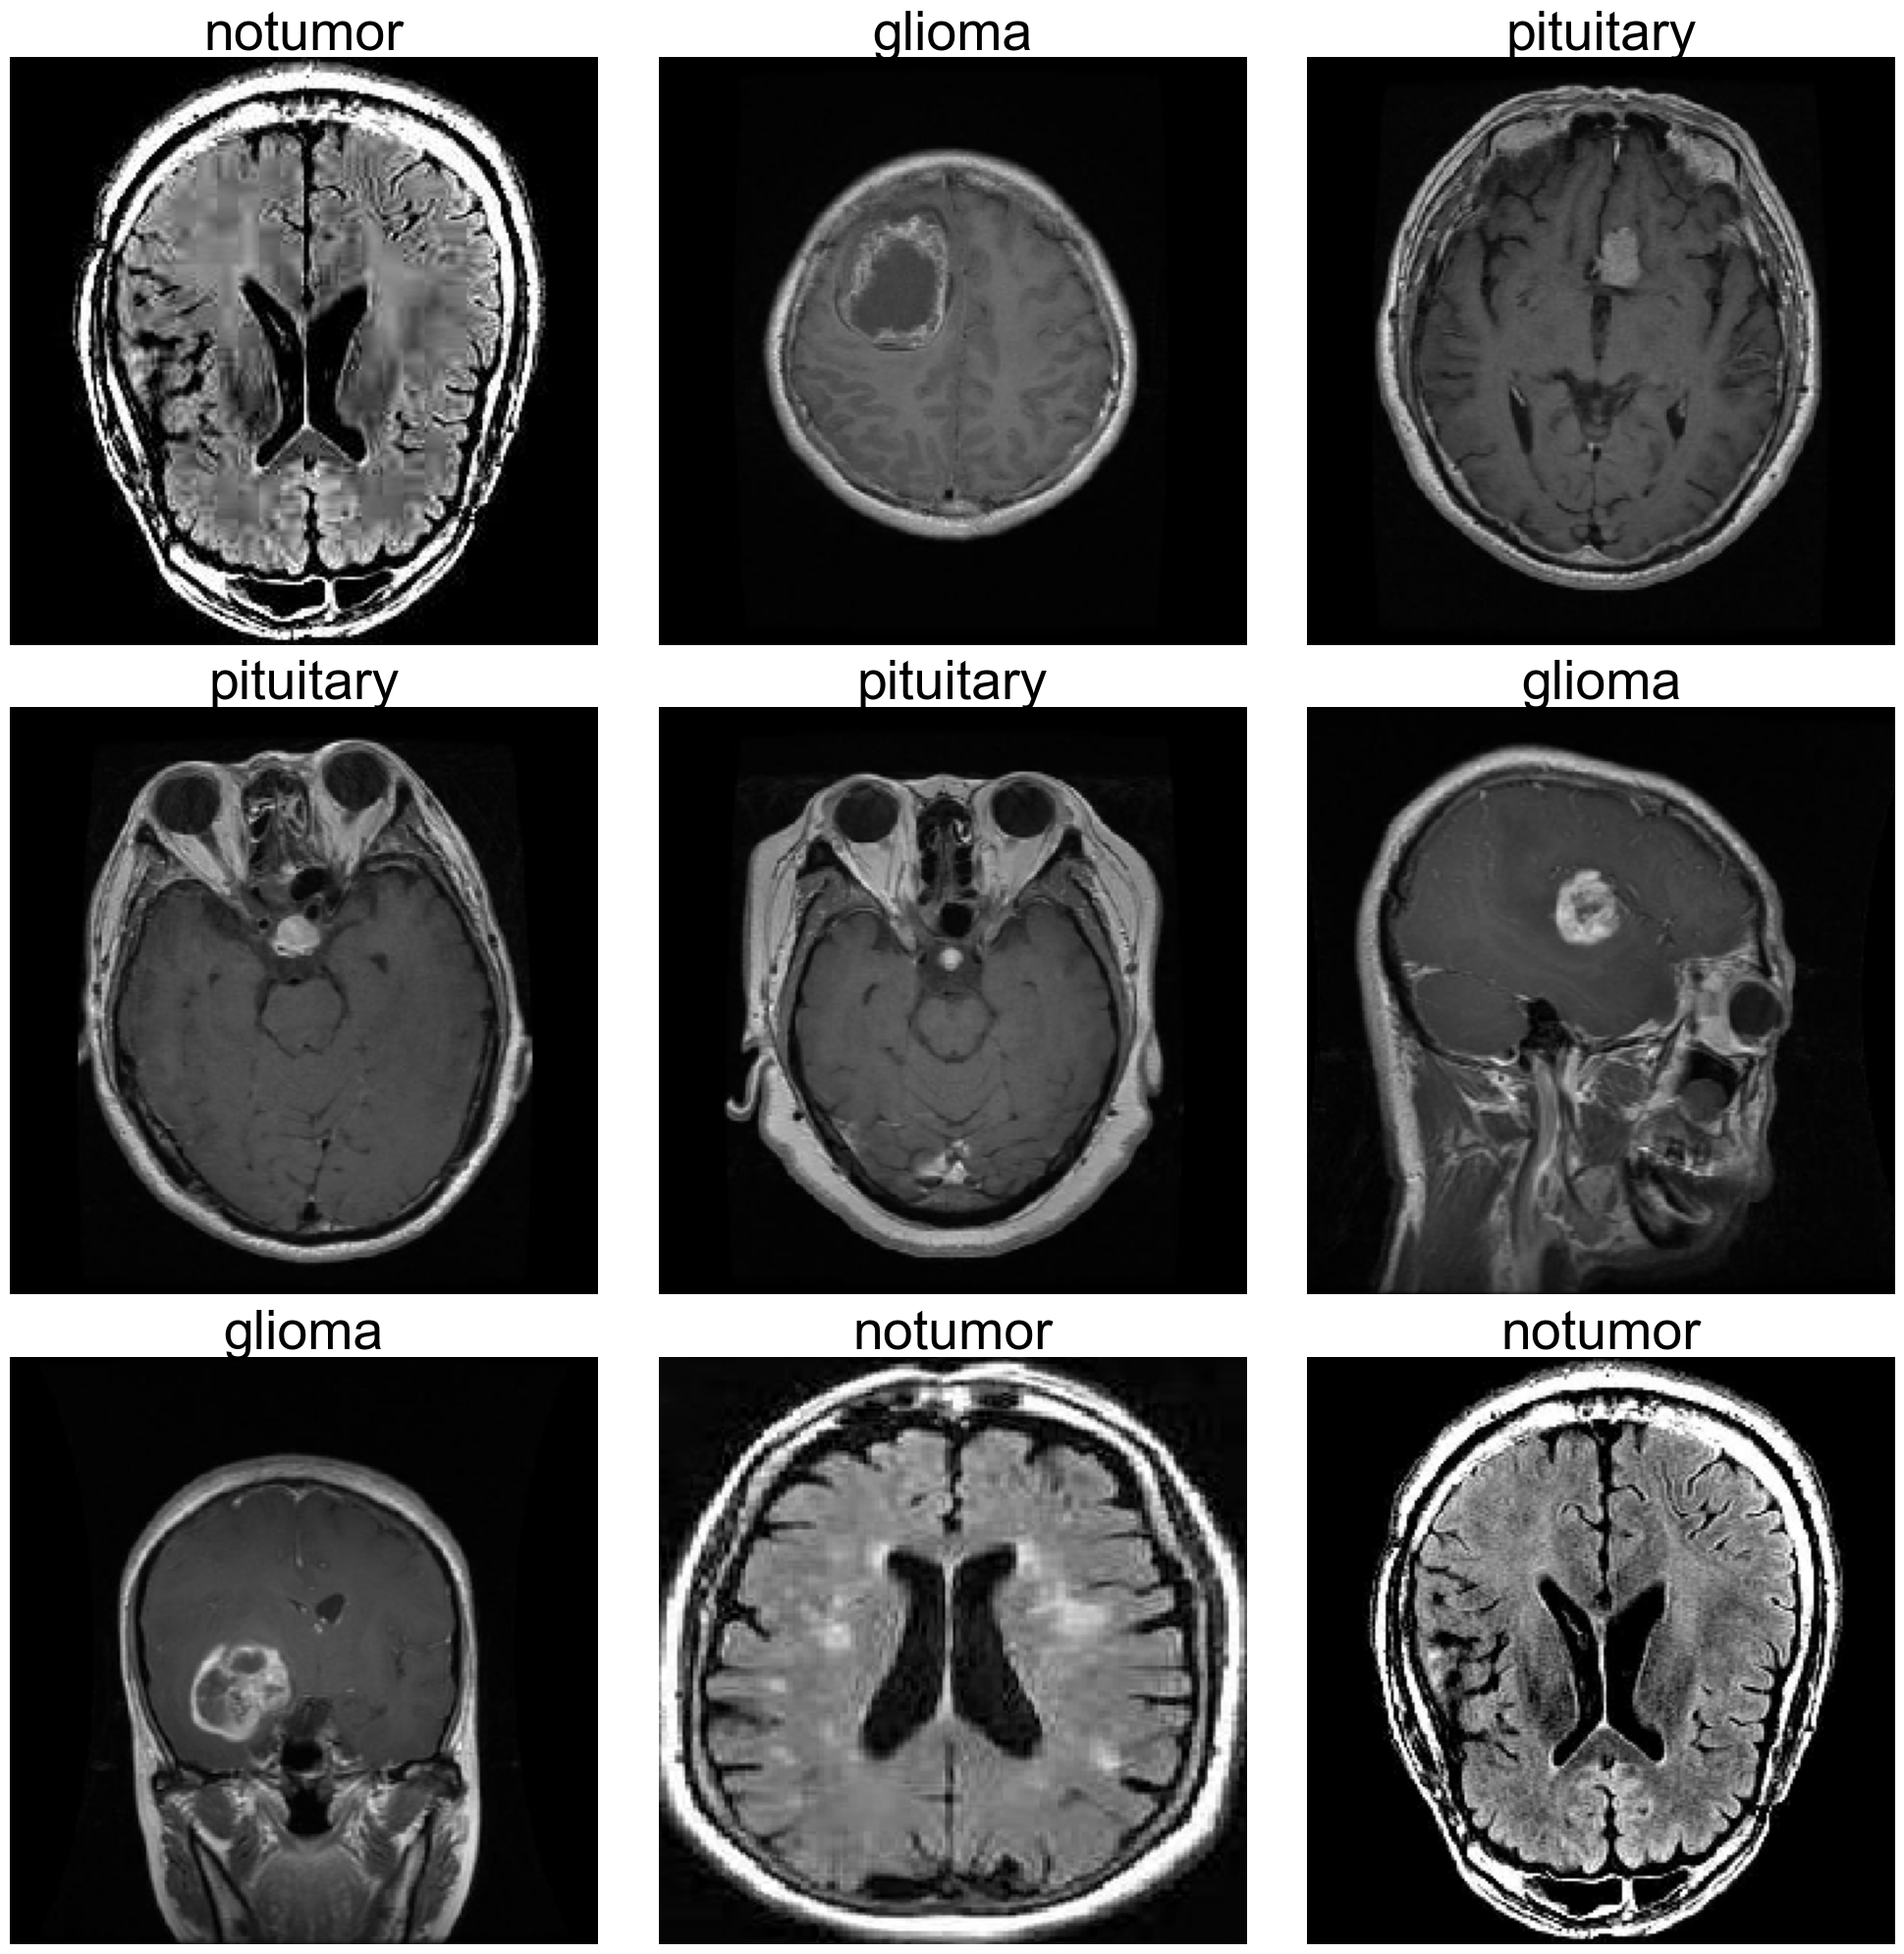

In [36]:
# visualize the batch
plt.figure(figsize= (20, 20))

for i in range(9):
    plt.subplot(3, 3, i +1)
    im = imgs[i]/255
    plt.imshow(im)
    
    index = np.argmax(labels[i])
    label = keys[index]
    plt.title(label, size=40, color = 'black')
    plt.axis('off')
    
plt.tight_layout()    
plt.show()

### Sample Batch from Test Data

In [37]:
# use the same label_index and keys

# get a sample batch
imgs, labels = next(test)

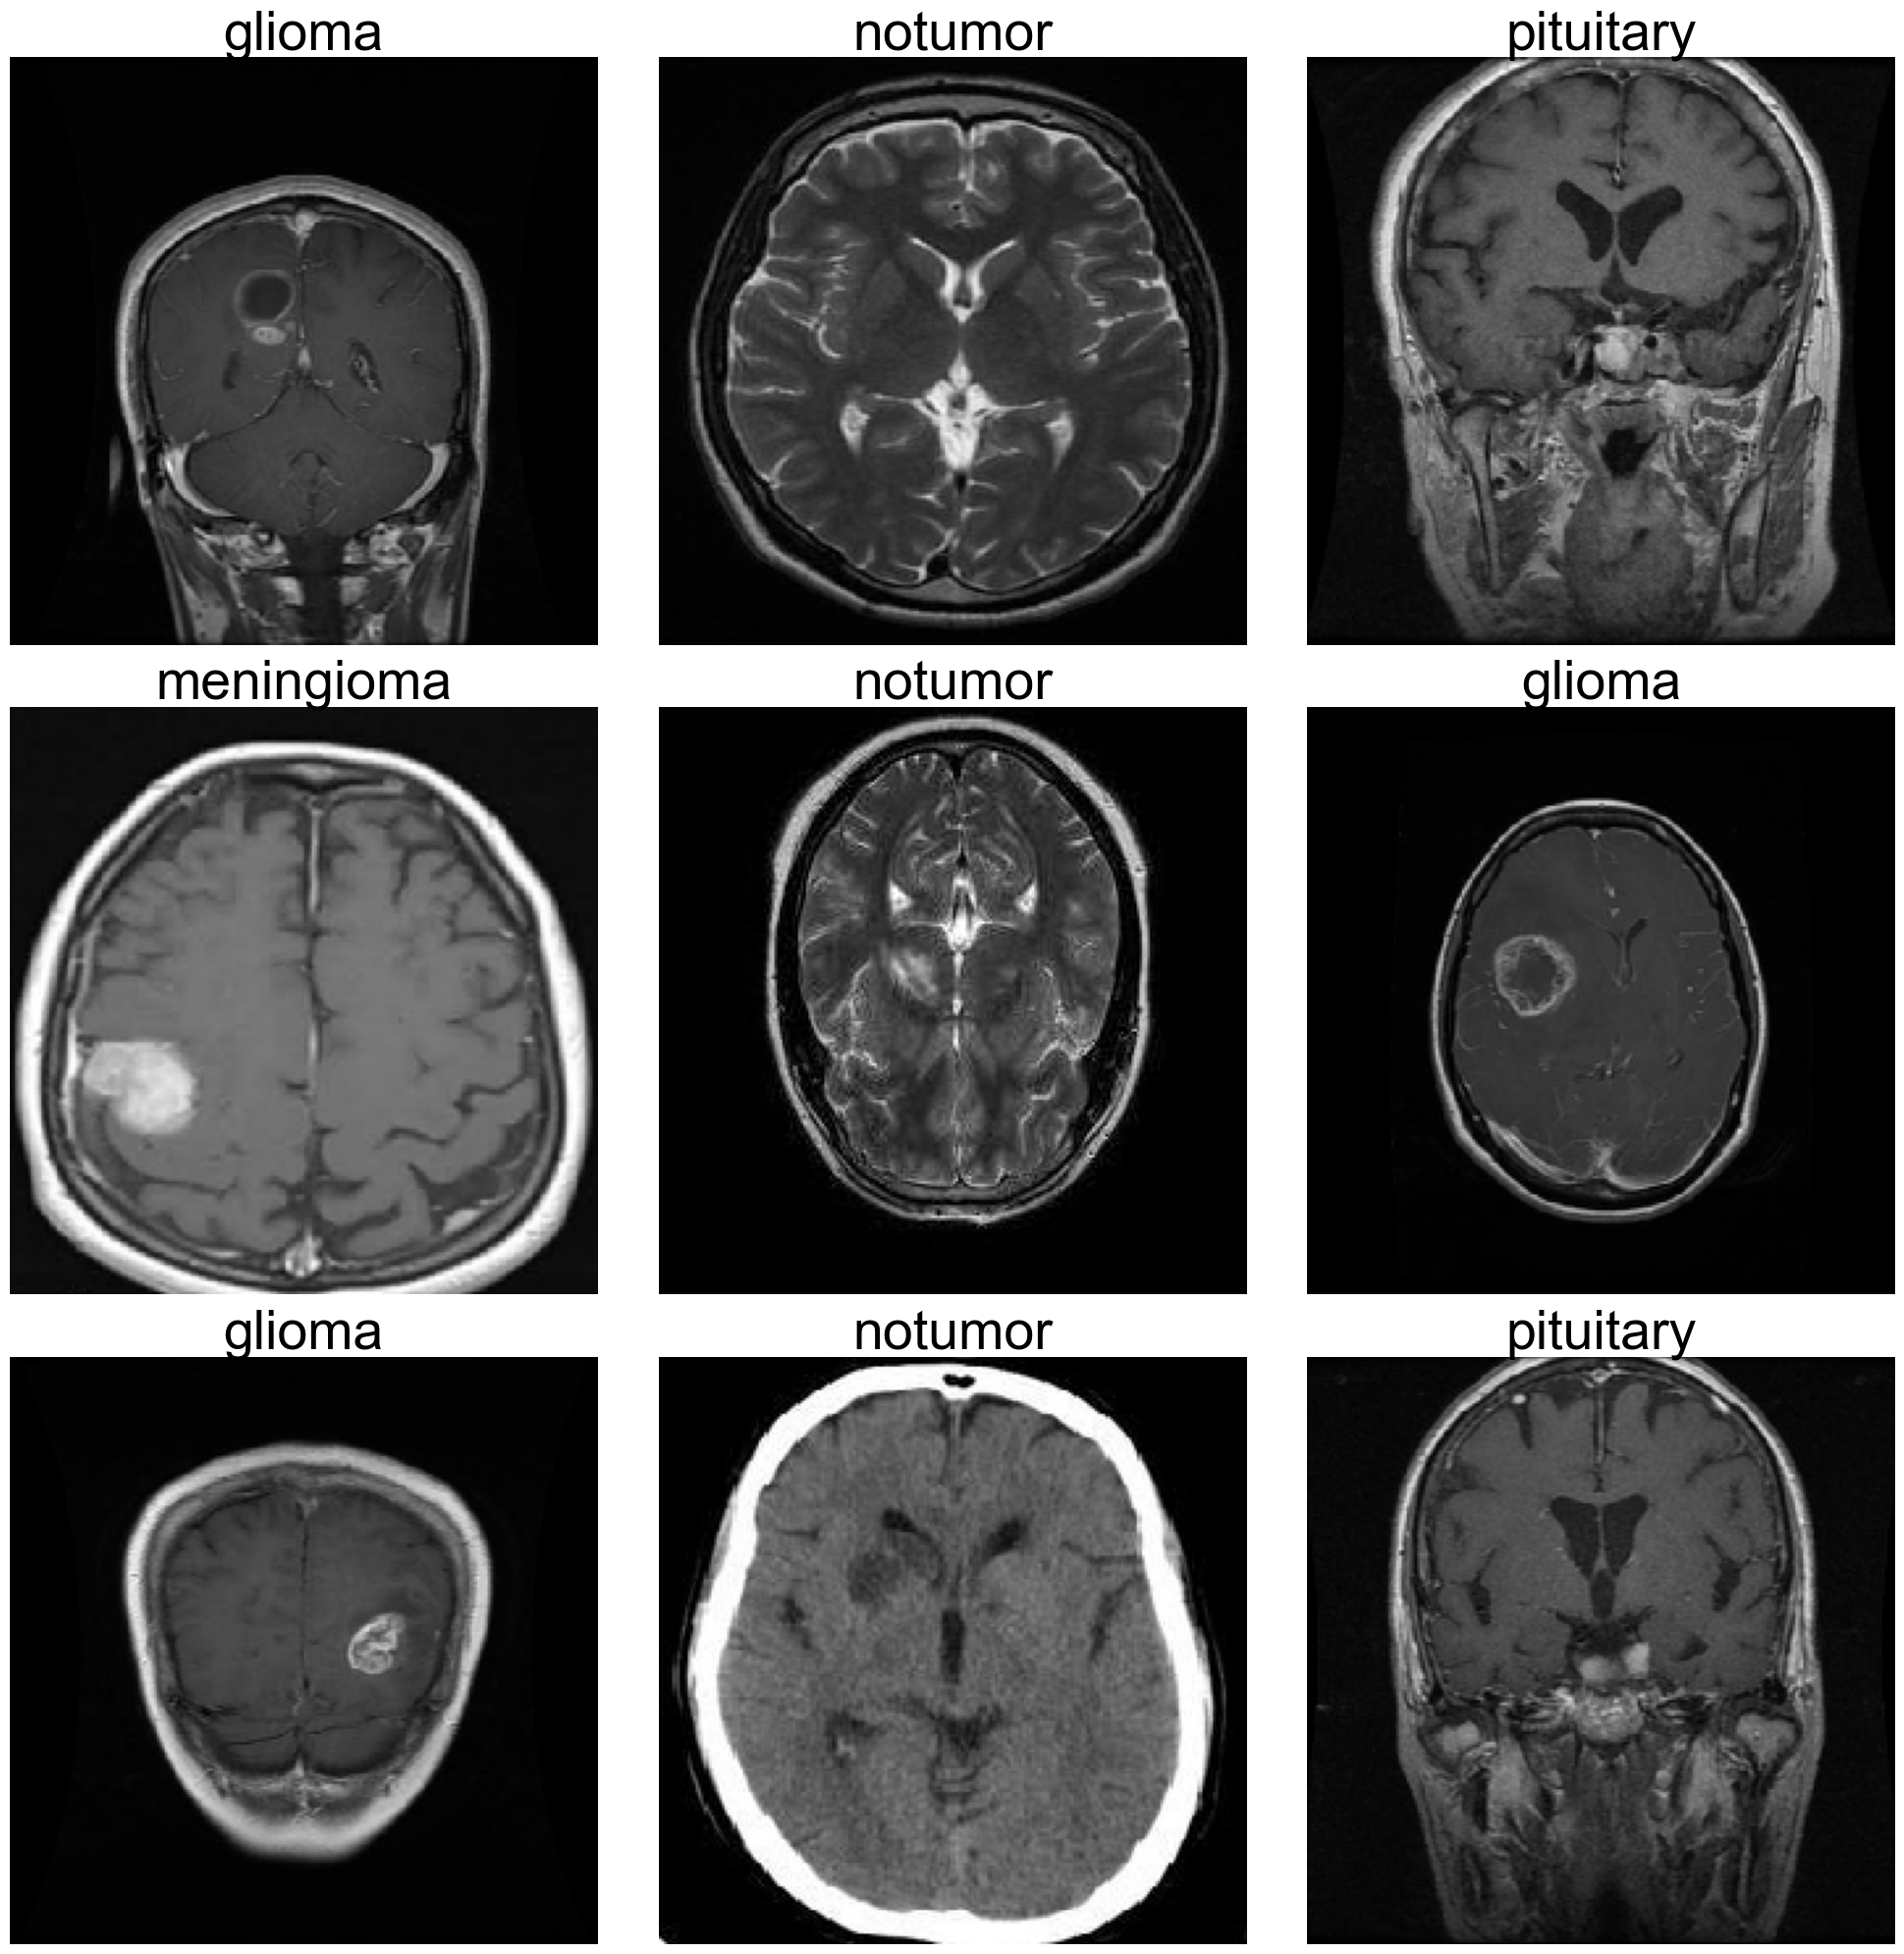

In [38]:
# visualize the batch
plt.figure(figsize= (20, 20))

for i in range(9):
    plt.subplot(3, 3, i +1)
    im = imgs[i]/255
    plt.imshow(im)
    
    index = np.argmax(labels[i])
    label = keys[index]
    plt.title(label, size=40, color = 'black')
    plt.axis('off')
    
plt.tight_layout()    
plt.show()

### Sample Batch from Validation Data

In [39]:
# use the same label_index and keys

# get a sample batch
imgs, labels = next(test)

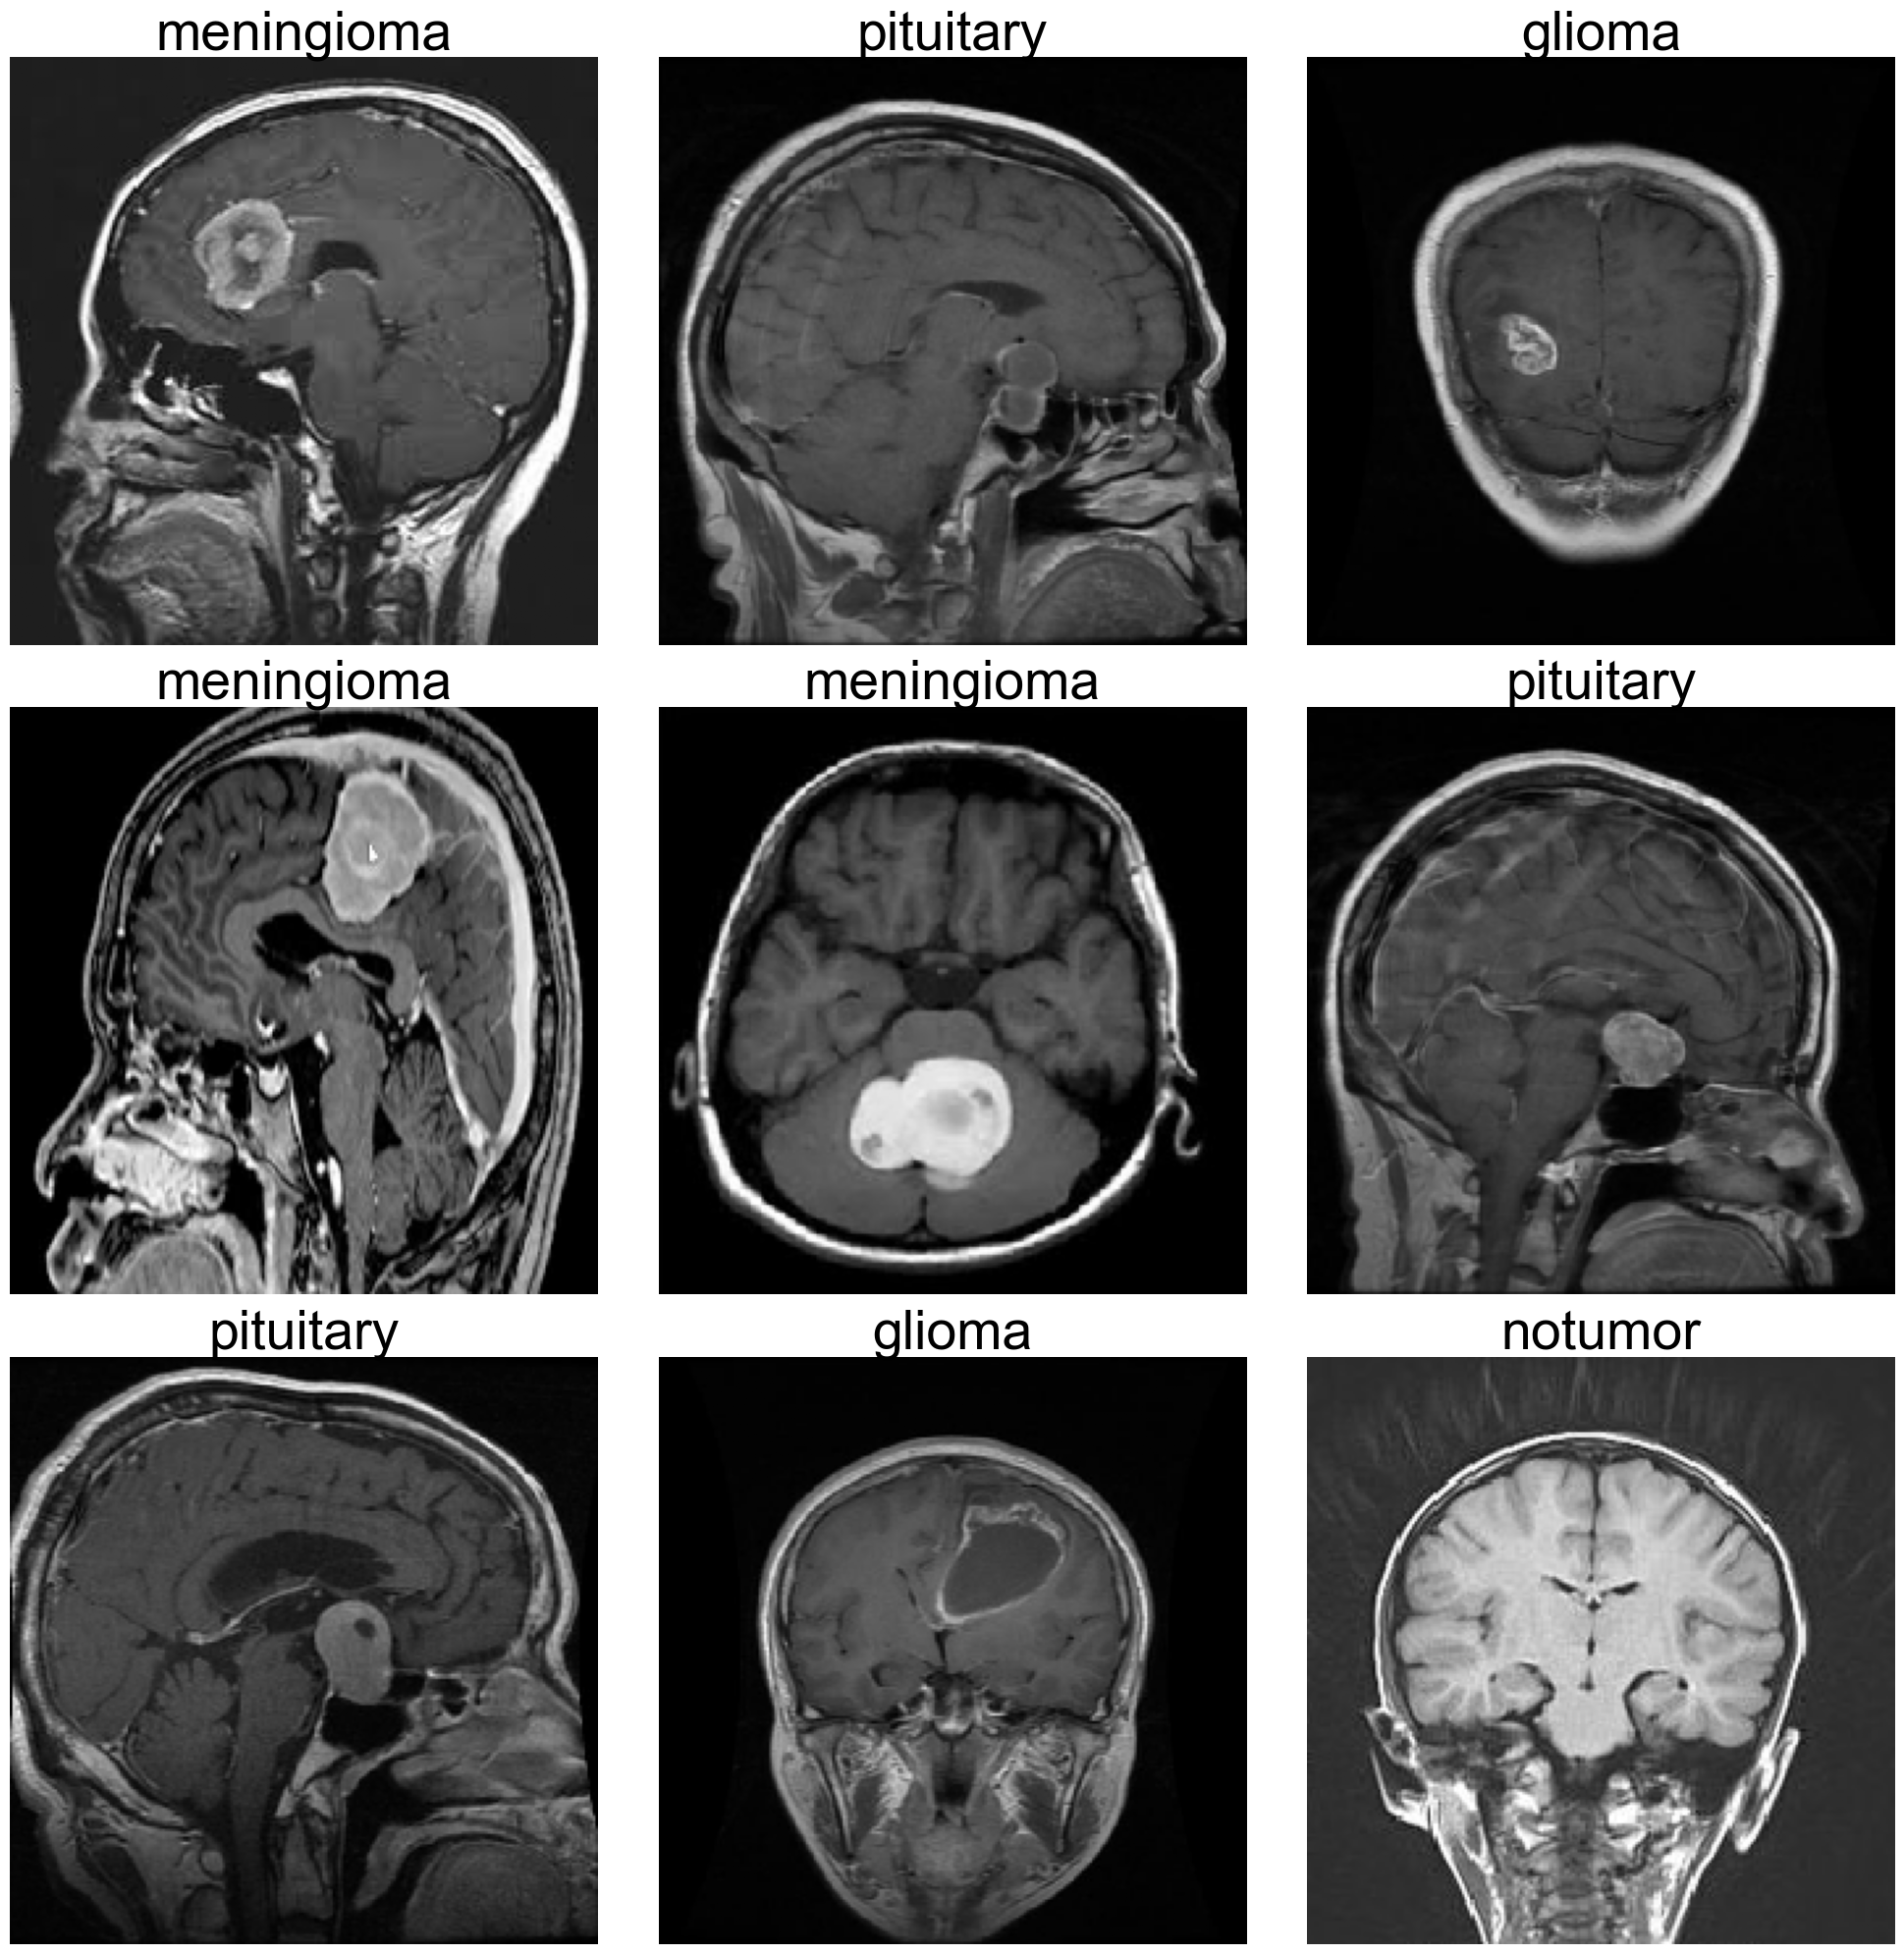

In [40]:
# visualize the batch
plt.figure(figsize= (20, 20))

for i in range(9):
    plt.subplot(3, 3, i +1)
    im = imgs[i]/255
    plt.imshow(im)
    
    index = np.argmax(labels[i])
    label = keys[index]
    plt.title(label, size=40, color = 'black')
    plt.axis('off')
    
plt.tight_layout()    
plt.show()

## Model Structure

In [41]:
# hyperparameters for CNN
batch_size = 20
img_size = (224,224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

In [42]:
# determine the number of unique classes to set the number of neurons in the final layer.
# each neuron represents the probability of a corresponding class
num_classes = len(list(train.class_indices.keys()))
num_classes

4

In [43]:
CNN = Sequential([
    Conv2D(filters = 128, kernel_size = (3,3), padding = 'same', activation = 'elu', input_shape = img_shape),
    Conv2D(filters = 128, kernel_size = (3,3), padding = 'same', activation = 'elu'),
    Conv2D(filters = 128, kernel_size = (3,3), padding = 'same', activation = 'elu'),
    MaxPooling2D((2,2)),
    
    Conv2D(filters = 256, kernel_size = (3,3), padding = 'same', activation = 'elu'),
    Conv2D(filters = 256, kernel_size = (3,3), padding = 'same', activation = 'elu'),
    MaxPooling2D((2,2)),
    
    Conv2D(filters = 256, kernel_size = (3,3), padding = 'same', activation = 'elu'),
    Conv2D(filters = 256, kernel_size = (3,3), padding = 'same', activation = 'elu'),
    MaxPooling2D((2,2)),
    
    Conv2D(filters = 128, kernel_size = (3,3), padding = 'same', activation = 'elu'),
    Conv2D(filters = 128, kernel_size = (3,3), padding = 'same', activation = 'elu'),
    MaxPooling2D((2,2)),
    
    Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', activation = 'elu'),
    Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', activation = 'elu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    
    Dense(256, activation = 'elu'),
    Dense(128, activation = 'elu'),
    Dense(64, activation = 'elu'),
    Dense(32, activation = 'elu'),
    Dense(num_classes, activation = 'softmax')
])

In [44]:
# model compilation
CNN.compile(Adamax(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics = 'accuracy')

In [45]:
CNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 128)     3584      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 128)     147584    
                                                                 
 conv2d_2 (Conv2D)           (None, 224, 224, 128)     147584    
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 128)     0         
 D)                                                              
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 256)     295168    
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 256)     590080    
                                                        

## Model Training

In [46]:
epochs = 15

history = CNN.fit(x=train, epochs=epochs, verbose=1, validation_data=valid, shuffle=False)


Epoch 1/15


5/5 [==============================] - 105s 20s/step - loss: 2.4977 - accuracy: 0.3100 - val_loss: 1.7638 - val_accuracy: 0.2000
Epoch 2/15
5/5 [==============================] - 130s 27s/step - loss: 2.0105 - accuracy: 0.2600 - val_loss: 1.7258 - val_accuracy: 0.3200
Epoch 3/15
5/5 [==============================] - 147s 30s/step - loss: 1.5276 - accuracy: 0.2900 - val_loss: 1.2168 - val_accuracy: 0.4600
Epoch 4/15
5/5 [==============================] - 167s 35s/step - loss: 1.2324 - accuracy: 0.4300 - val_loss: 1.1945 - val_accuracy: 0.4600
Epoch 5/15
5/5 [==============================] - 120s 22s/step - loss: 1.2445 - accuracy: 0.4200 - val_loss: 1.2864 - val_accuracy: 0.3400
Epoch 6/15
5/5 [==============================] - 107s 22s/step - loss: 1.2398 - accuracy: 0.4400 - val_loss: 1.2067 - val_accuracy: 0.4000
Epoch 7/15
5/5 [==============================] - 119s 24s/step - loss: 1.1395 - accuracy: 0.4100 - val_loss: 1.0021 - val_accuracy: 0.5800
Epoch 8/15
5/5 [==

## Model Evaluation

### Metrics

In [47]:
# accuracy and loss on training data
training_acc = history.history['accuracy']
training_loss = history.history['loss']

# accuracy and loss on validation data
validation_acc = history.history['val_accuracy']
validation_loss = history.history['val_loss']

# highest value of validation accuracy, and index of where it happened
index_acc = np.argmax(validation_acc)
high_validation_acc = validation_acc[index_acc]

# lowed value of validation accuracy, and index of where it happened
index_loss = np.argmin(validation_loss)
low_validation_loss = validation_loss[index_loss]

# number of epochs based on length of training accuracy values
epochs =[]
for i in range(len(training_acc)):
    epochs.append (i+1)

# define best epoch
best_acc = f'Best Epoch ={str(index_acc +1)}'
best_loss = f'Best Epoch ={str(index_loss+1)}'

### Visualize

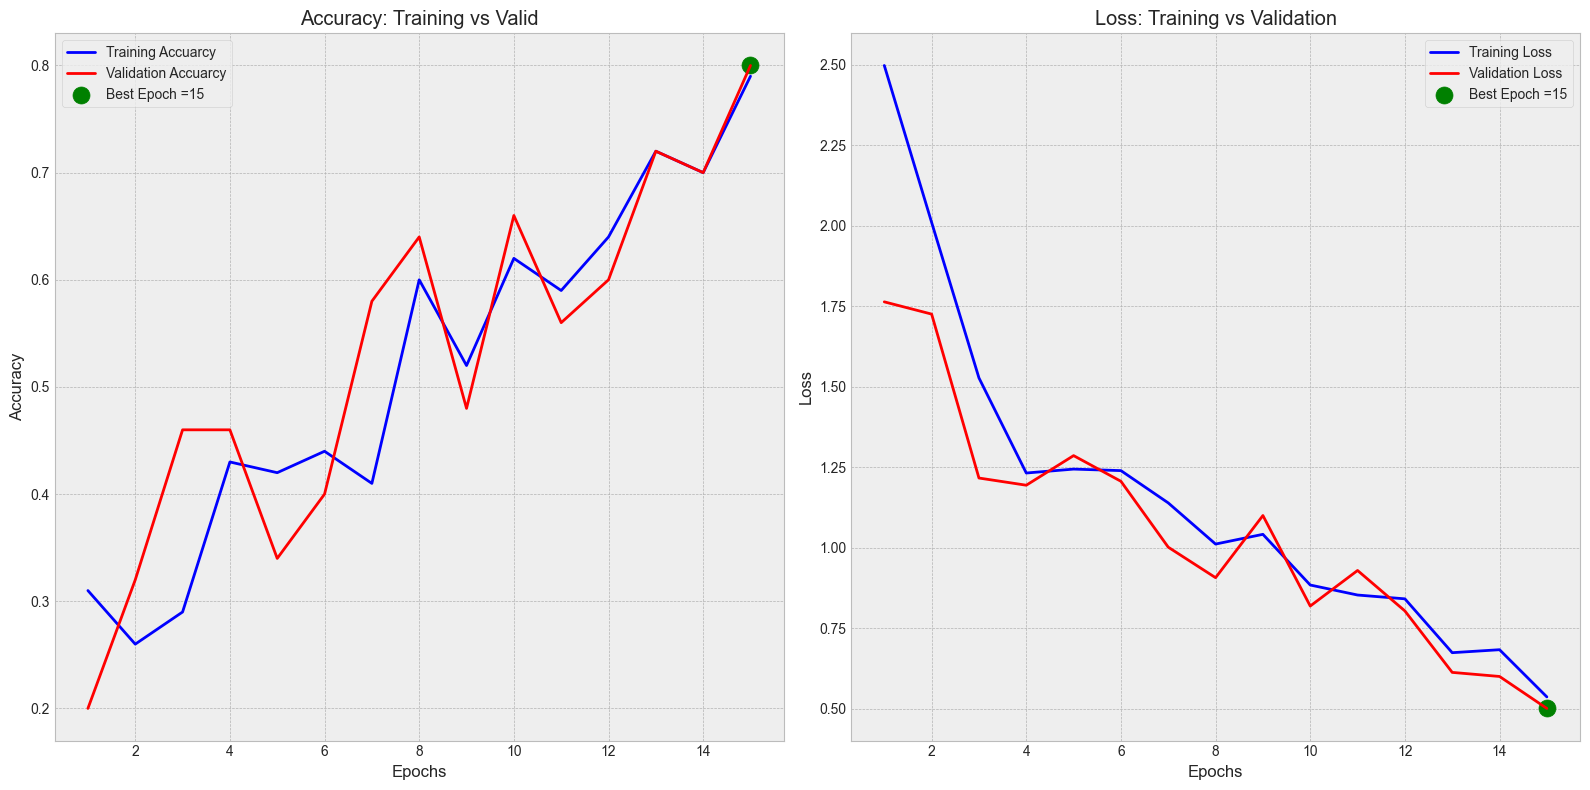

In [48]:
plt.figure(figsize = (16, 8))
plt.style.use('bmh')

plt.subplot(1,2,1)
plt.plot(epochs, training_acc, "b", label = "Training Accuarcy")
plt.plot(epochs, validation_acc, "r", label = "Validation Accuarcy")
plt.scatter(index_acc+1, high_validation_acc, s= 150, color = 'green', label = best_acc)

plt.title("Accuracy: Training vs Valid")
plt. xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, training_loss, "b", label = "Training Loss")
plt.plot(epochs, validation_loss, "r", label = "Validation Loss")
plt.scatter(index_loss+1, low_validation_loss, s= 150, color = 'green', label = best_loss)

plt.title("Loss: Training vs Validation")
plt. xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

### Get Scores

In [49]:
train_score = CNN.evaluate(train, verbose = 0)
valid_score = CNN.evaluate(valid, verbose = 0)
test_score = CNN.evaluate(test, verbose = 0)

print('____________________________________________________________________')
print(f'Train Scores:        | Validation Scores:    | Test Scores:')
print(f'    Accuracy: {train_score[1]:.4f} |     Accuracy: {valid_score[1]:.4f}  |     Accuracy: {test_score[1]:.4f}')
print(f'    Loss: {train_score[0]:.4f}     |     Loss: {valid_score[0]:.4f}      |     Loss: {test_score[0]:.4f}')
print('_____________________|_______________________|______________________')

____________________________________________________________________
Train Scores:        | Validation Scores:    | Test Scores:
    Accuracy: 0.8400 |     Accuracy: 0.8000  |     Accuracy: 0.8800
    Loss: 0.4140     |     Loss: 0.5015      |     Loss: 0.3266
_____________________|_______________________|______________________


In [50]:
print('____________________________________________________________________')
print(f'Train Scores:        | Validation Scores:    | Test Scores:')
print(f'    Accuracy: {train_score[1]:.4f} |     Accuracy: {valid_score[1]:.4f}  |     Accuracy: {test_score[1]:.4f}')
print(f'    Loss: {train_score[0]:.4f}     |     Loss: {valid_score[0]:.4f}      |     Loss: {test_score[0]:.4f}')
print('_____________________|_______________________|______________________')



____________________________________________________________________
Train Scores:        | Validation Scores:    | Test Scores:
    Accuracy: 0.8400 |     Accuracy: 0.8000  |     Accuracy: 0.8800
    Loss: 0.4140     |     Loss: 0.5015      |     Loss: 0.3266
_____________________|_______________________|______________________


## Model Predictions

In [51]:
predictions = CNN.predict(test)
y_pred = np.argmax(predictions, axis = 1)

print("\nPredictions (Probabilities of Each Class):\n", predictions[:5])  # show first 5 predictions
print("\nPredicted Classes (Highest Probable Class):\n", y_pred[:5])  # show first 5 predicted classes

3/3 [==============================] - 17s 5s/step

Predictions (Probabilities of Each Class):
 [[8.1773788e-01 1.7974433e-01 1.9819748e-03 5.3573889e-04]
 [1.0386045e-01 4.4216678e-02 3.2875806e-01 5.2316481e-01]
 [9.4517376e-03 3.8446449e-02 1.0409756e-01 8.4800422e-01]
 [5.2685090e-03 5.6480205e-01 2.6925430e-01 1.6067523e-01]
 [1.9270353e-01 4.7387708e-02 5.1341105e-01 2.4649777e-01]]

Predicted Classes (Highest Probable Class):
 [0 3 3 1 2]


### Confusion Matrix

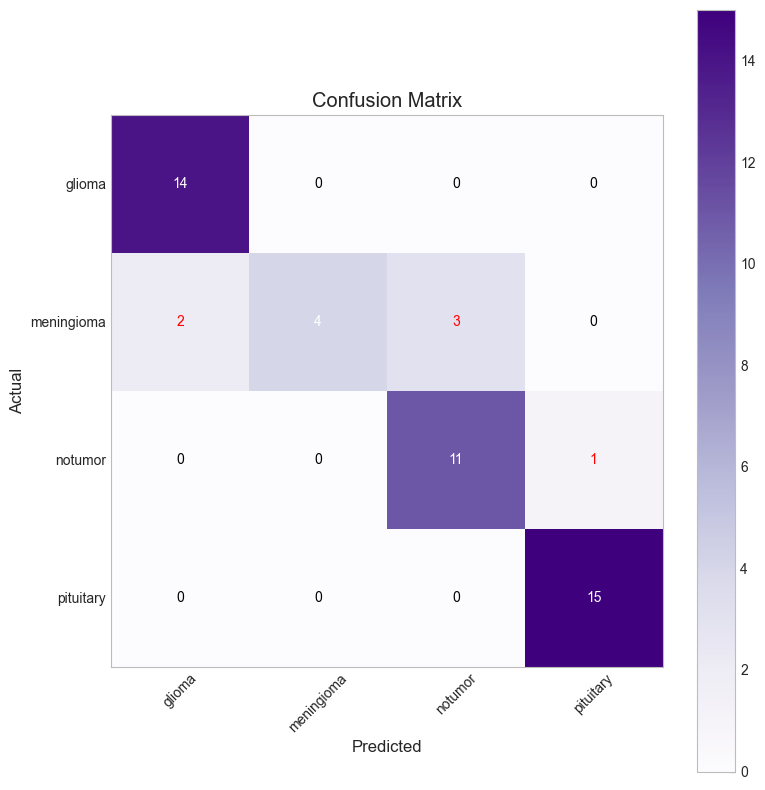

In [52]:
# Use n. of keys of  Class indices to greate confusion matrix
Test_cl_ind = test.class_indices
 
# Get Keys
classes = list(Test_cl_ind.keys())

cm = confusion_matrix(test.classes, y_pred)

plt.figure(figsize =(8, 8))
plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Purples)
plt.title("Confusion Matrix")
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes,rotation = 45)
plt.yticks(tick_marks, classes)

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if cm[i, j] == 0:
        text_color = 'black'  # black for zero values
    elif i == j:
        text_color = 'white'  # white for diagonal (correct classifications)
    else:
        text_color = 'red'    # red for misclassifications

    plt.text(j, i, cm[i, j],
             horizontalalignment='center',
             verticalalignment='center',
             color=text_color)

plt.grid(False)
plt.tight_layout()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### Classification Report (Precision, Recall, F1-Score, Accuracy Metrics)

In [53]:
print(classification_report(test.classes, y_pred, target_names = classes))

              precision    recall  f1-score   support

      glioma       0.88      1.00      0.93        14
  meningioma       1.00      0.44      0.62         9
     notumor       0.79      0.92      0.85        12
   pituitary       0.94      1.00      0.97        15

    accuracy                           0.88        50
   macro avg       0.90      0.84      0.84        50
weighted avg       0.89      0.88      0.87        50



## Save Model

In [54]:
CNN.save('models/brain_tumor_cnn_classifier.keras')

# Load Model (Test Case)

In [55]:
# load model
CNN = tf.keras.models.load_model("models/brain_tumor_cnn_classifier.keras", compile=False)
CNN.compile(optimizer=tf.keras.optimizers.Adamax(learning_rate=0.001), 
            loss='categorical_crossentropy', 
            metrics=['accuracy'])

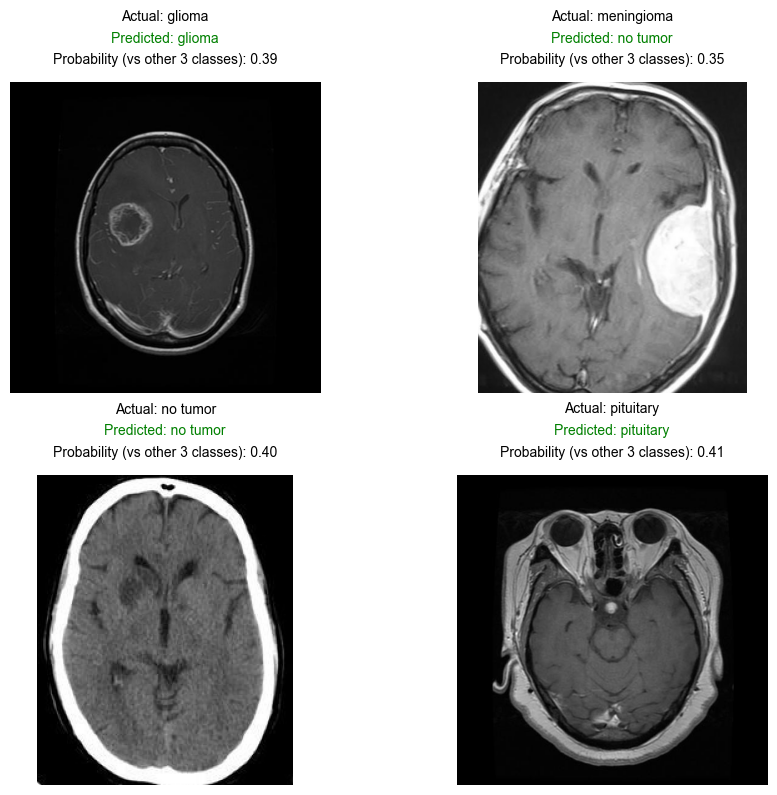

In [63]:
# imports if we loaded this independently (inside web app)
from PIL import Image # instead of openCV since simpler tasks
import tensorflow as tf
import numpy as np

# paths to images from each class
image_paths = {
    'glioma': "C:\\Users\\Ajinkya Pawar\\OneDrive\\Documents\\tum\\MRI-Brain-Tumor-Detection-main\\mri-images\\glioma\\Te-gl_0014.jpg",
    'meningioma': "C:\\Users\\Ajinkya Pawar\\OneDrive\\Documents\\tum\\MRI-Brain-Tumor-Detection-main\\mri-images\\meningioma\\Te-me_0012.jpg",
    'no tumor': "C:\\Users\\Ajinkya Pawar\\OneDrive\\Documents\\tum\\MRI-Brain-Tumor-Detection-main\\mri-images\\notumor\\Te-no_0010.jpg",
    'pituitary': "C:\\Users\\Ajinkya Pawar\\OneDrive\\Documents\\tum\\MRI-Brain-Tumor-Detection-main\\mri-images\\pituitary\\Te-pi_0010.jpg"
}
# initializations
plt.figure(figsize=(10, 8))
class_labels = ['glioma', 'meningioma', 'no tumor', 'pituitary']

for i, (label, path) in enumerate(image_paths.items()):
    img = Image.open(path)
    img_resized = img.resize((224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img_resized)
    img_array = np.expand_dims(img_array, axis=0)  # expand dimensions to fit model input

    # predict and process the results
    predictions = CNN.predict(img_array, verbose=0) # verbose at 0 to prevent status plot
    score = tf.nn.softmax(predictions[0])
    predicted_class = class_labels[np.argmax(score)]

    # plot
    plt.subplot(2, 2, i + 1)
    plt.imshow(img)
    plt.axis('off')

    # title
    actual_text = f'Actual: {label}'
    predicted_text = f'Predicted: {predicted_class}'
    probability_text = f'Probability (vs other 3 classes): {np.max(score):.2f}'
    
    # title formatting
    spacing = 0.02
    plt.text(0.5, 1.15 + 2*spacing, actual_text, ha='center', va='bottom', transform=plt.gca().transAxes, fontsize='medium', color='black')
    plt.text(0.5, 1.10 + spacing, predicted_text, ha='center', va='bottom', transform=plt.gca().transAxes, fontsize='medium', color='green')
    plt.text(0.5, 1.05, probability_text, ha='center', va='bottom', transform=plt.gca().transAxes, fontsize='medium', color='black')

plt.tight_layout()
plt.show()